In [32]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

ride_data.head()


# Combine the data into a single dataset
df_city_ride = pd.DataFrame.merge(city_data,ride_data)
df_city_ride.head()
# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

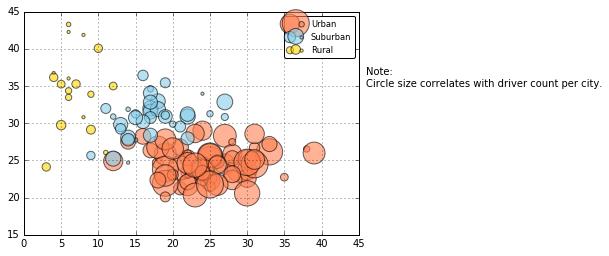

In [59]:
# Obtain the x and y coordinates for each of the three city types
# Isolate the data we need to work with
city_type = df_city_ride["type"].unique()
df_city_type = pd.DataFrame(city_type)
city_group = df_city_ride.groupby("city")
city_types = city_group["type"].value_counts()
df_city_types = pd.DataFrame(city_types)
type_group = df_city_ride.groupby("type")
avg_fare = 100*(type_group.sum()['fare']/df_city_ride["fare"].sum())
total_rides = type_group["ride_id"].sum()
urban = df_city_ride[df_city_ride["type"] == "Urban"]
rural = df_city_ride[df_city_ride["type"] == "Rural"]
suburban = df_city_ride[df_city_ride["type"] == "Suburban"]

u_count = urban.groupby(["city"]).count()["ride_id"]
r_count = rural.groupby(["city"]).count()["ride_id"]
s_count = suburban.groupby(["city"]).count()["ride_id"]
u_avg = urban.groupby(["city"]).mean()["fare"]
r_avg = rural.groupby(["city"]).mean()["fare"]
s_avg = suburban.groupby(["city"]).mean()["fare"]
u_driver_count = urban.groupby(["city"]).mean()["driver_count"]
s_driver_count = suburban.groupby(["city"]).mean()["driver_count"]
r_driver_count = rural.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt_urban = plt.scatter(u_count, u_avg, c="coral", s = 10 * u_driver_count, edgecolor="black",
                       linewidths = 1, marker = "o",alpha = .6, label = "Urban")
plt_rural = plt.scatter(r_count, r_avg, c="gold", s = 10 * r_driver_count, edgecolor="black",
                       linewidths = 1, marker = "o",alpha = .6, label = "Rural")
plt_suburban = plt.scatter(s_count, s_avg, c="skyblue", s = 10 * s_driver_count, edgecolor="black",
                       linewidths = 1, marker = "o",alpha = .6, label = "Suburban")

# Incorporate the other graph properties
plt.grid(True)
# Create a legend
plt.legend(handles = [plt_urban, plt_suburban, plt_rural],loc = "best", fontsize = "small", fancybox = True)
# Incorporate a text label regarding circle size
plt.text(46, 35, "Note:\nCircle size correlates with driver count per city.")
# Save Figure
plt.show()

## Total Fares by City Type

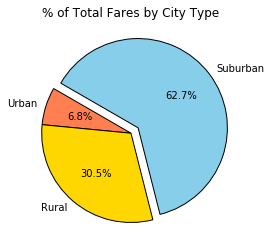

In [68]:
# Calculate Type Percents
type_pcts = 100 * df_city_ride.groupby(["type"]).sum()["fare"] / df_city_ride["fare"].sum()

# Build Pie Chart
plt.pie(type_pcts, labels = ["Urban", "Rural", "Suburban"], 
        colors = ["coral", "gold", "skyblue"], 
        explode = [0, 0, 0.1], autopct= "%1.1f%%", startangle = 150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.show()

## Total Rides by City Type

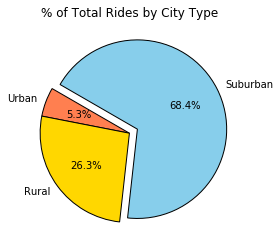

In [82]:
# Calculate Ride Percents
ride_pcts = 100 * df_city_ride.groupby(["type"]).count()["ride_id"] / df_city_ride["ride_id"].count()

# Build Pie Chart
plt.pie(ride_pcts, labels = ["Urban", "Rural", "Suburban"], 
        colors = ["coral", "gold", "skyblue"], 
        explode = [0, 0, 0.1], autopct = "%1.1f%%", startangle = 150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.show()

## Total Drivers by City Type

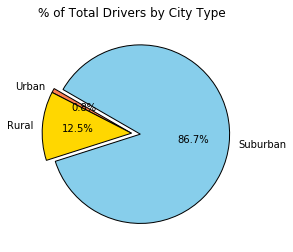

In [86]:
# Calculate Driver Percents
driver_pcts = 100 * df_city_ride.groupby(["type"]).sum()["driver_count"] / df_city_ride["ride_id"].count()

# Build Pie Charts
plt.pie(driver_pcts, labels = ["Urban", "Rural", "Suburban"], 
        colors = ["coral", "gold", "skyblue"], 
        explode = [0, 0, 0.1], autopct = "%1.1f%%", startangle = 150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.show()